<a href="https://colab.research.google.com/github/dvasylyshyn/Gene_Expression/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
import io
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2 (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data2.csv']))

In [ ]:
df


,Unnamed: 0,Unnamed: 0.1,Class,Class2,gene_3,gene_4,gene_6,gene_19,gene_22,gene_27,...,gene_16360,gene_16362,gene_16363,gene_16365,gene_16368,gene_16370,gene_16373,gene_16374,gene_16375,gene_16382
0,405,sample_405,BRCA,0,7.568853,10.127543,10.063179,7.815678,8.909473,10.095094,...,9.155562,9.529384,6.450619,9.686227,9.358300,11.031894,8.762462,9.191977,9.506149,9.542954
1,406,sample_406,BRCA,0,7.111699,11.355621,9.025710,7.442496,8.368445,9.818013,...,8.671739,5.745124,0.751549,9.298968,9.453246,10.766545,8.657354,9.081385,5.295745,8.642821
2,407,sample_407,BRCA,0,6.015689,9.226675,7.422965,9.414979,6.492598,8.749776,...,9.211978,8.273847,3.635325,9.161661,9.312320,10.578297,7.212618,11.884155,9.107042,9.779051
3,409,sample_409,BRCA,0,6.329416,9.936533,7.930034,10.953098,8.498901,8.683075,...,10.552227,9.107696,7.328567,9.117344,9.551860,11.089801,6.901482,12.187664,7.587545,9.054401
4,410,sample_410,BRCA,0,6.156666,11.006705,8.746330,8.034386,8.241611,9.538078,...,8.938665,6.612358,4.866498,8.031158,9.677496,11.090920,7.979019,9.509320,5.246993,9.782148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,783,sample_783,PRAD,4,6.427137,10.432187,8.353760,5.613579,9.077053,11.498555,...,10.530299,4.956800,4.191105,9.077053,8.849974,11.267992,7.923642,7.038436,2.069496,7.931943
648,788,sample_788,PRAD,4,6.369039,9.684507,7.929903,9.153674,7.179372,9.159773,...,10.343308,6.595389,4.453412,8.166339,9.349564,10.577986,7.237191,10.027920,7.836555,8.725271
649,794,sample_794,PRAD,4,7.209151,9.875620,7.332717,9.316162,6.810816,9.642637,...,10.359222,7.197610,6.388563,8.965888,8.950334,10.832170,7.409179,9.823211,5.177543,9.059536
650,799,sample_799,PRAD,4,7.318624,9.987136,9.213464,7.987867,9.770383,10.163713,...,10.508785,6.842489,5.312814,9.707483,8.989261,12.104949,7.673691,9.408519,3.991236,9.130936


In [ ]:
X=df.iloc[:,4:9764]
y=df.iloc[:,[2]]

In [ ]:
y.value_counts()

Class
BRCA     151
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

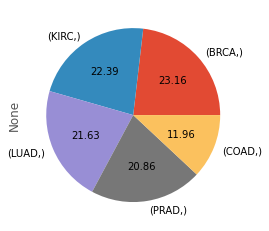

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)


In [ ]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train.values.ravel())
#predict the response
pred = cls.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, pred)
ac = accuracy_score(y_test,pred)

In [ ]:
print("Confusion Matrix:\n", + cm)
print()
print("Accuracy Score: ", + ac)

Confusion Matrix:
 [[78  0  0  0  0]
 [ 0 43  0  0  0]
 [ 0  0 75  0  0]
 [ 1  0  0 64  0]
 [ 0  0  0  0 65]]

Accuracy Score:  0.9969325153374233


In [ ]:
from sklearn import metrics


In [ ]:
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
print("precision:", metrics.precision_score(y_test,y_pred=pred,average="micro"))
print("recall" , metrics.recall_score(y_test,y_pred=pred,average="micro"))
print(metrics.classification_report(y_test, y_pred=pred))

acuracy: 0.9969325153374233
precision: 0.9969325153374233
recall 0.9969325153374233
              precision    recall  f1-score   support

        BRCA       0.99      1.00      0.99        78
        COAD       1.00      1.00      1.00        43
        KIRC       1.00      1.00      1.00        75
        LUAD       1.00      0.98      0.99        65
        PRAD       1.00      1.00      1.00        65

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326
weighted avg       1.00      1.00      1.00       326

